<a href="https://colab.research.google.com/github/mccarthyajb/HL-NTAC/blob/Fixed-CICIDS2017-Dataset/1_Read_In_and_Resample_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Not connected to a GPU
Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# SDAV Extra - Violin Plots

This notebook will demonstrate the use of Violin Plots. This visualisation technique, similar to a box plot, is well suited for comparing multiple distributions, and show a curved distribution plot for each feature under consideration. Below shows a simple violin plot example using Seaborn.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Drive already mounted at ./mount; to attempt to forcibly remount, call drive.mount("./mount", force_remount=True).
Drive Mounted


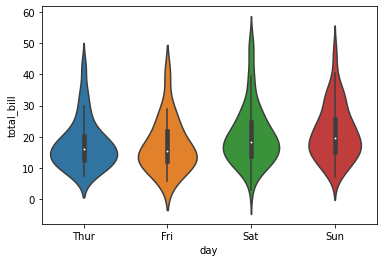

In [2]:
#!pip install seaborn
!pip install lime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('./mount')
print("Drive Mounted")

tips = sns.load_dataset("tips")
ax = sns.violinplot(x="day", y="total_bill", data=tips)

## Case Study: Comparing Benign and DDoS behaviours in network traffic analysis using CICIDS2017

Let's consider an example where we want to look at benign and malicious network traffic. We will use to CICIDS2017 dataset for this. This dataset captures in the region of 80 numerical features that characterise network activity. Each data instance has been labelled as either benign or as an attack type (we focus on DDoS here, however other attacks are present in the full dataset). What data attributes set these two classes apart? We can use violin plots to judge this visually over the entire dataset.

### Load in dataset and clean it up

First we will load in the data set, and we will remove all Not-a-Number and Infinity values that may be present. We will also remove columns that contain only zeros (i.e., no separating features).

In [3]:
# Load in the dataset

DATASET_PATH = 'mount/My Drive/Colab Notebooks/FIXED-CICIDS2017/'
df1 = pd.read_csv(DATASET_PATH + 'Friday-WorkingHours.csv')

#df1=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
print("Read in df1 - DDoS")

#df2=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#print("Read in df2 - PortScan")
    
#df3=pd.read_csv('mount/My Drive/Colab Notebooks/CICIDS2017//Friday-WorkingHours-Morning.pcap_ISCX.csv')
#print("Read in df3 - Botnet")
    
df4=pd.read_csv(DATASET_PATH + 'Monday-WorkingHours.csv')
print("Read in df4 - Benign (Normal Human Activities)")
    
df5=pd.read_csv(DATASET_PATH + 'Thursday-WorkingHours.csv')
print("Read in df5 - Infiltration")
    
#df6=pd.read_csv(DATASET_PATH + 'Thursday-WorkingHours.csv')
#print("Read in df6 - Web Attacks")
    
df7=pd.read_csv(DATASET_PATH + 'Tuesday-WorkingHours.csv')
print("Read in df7 - Brute Force")
    
df8=pd.read_csv(DATASET_PATH + 'Wednesday-WorkingHours.csv')
print("Read in df8 - DoS/DDoS/HeartBleed")

#frames = [df1, df2, df3, df4]
#frames = [df1, df2, df3, df4, df5, df6, df7, df8]
frames = [df1, df4, df5, df7, df8]
print("Before Concat")
df = pd.concat(frames)

#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Friday-WorkingHours-Morning.pcap_ISCX.csv')
#df = pd.read_csv('./CICIDS2017/TrafficLabelling/Monday-WorkingHours.pcap_ISCX.csv')
# Remove NaN and Inf
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# Remove columns with all zero values
df = df.loc[:, (df != 0).any(axis=0)]
# Output table
df

Read in df1 - DDoS
Read in df4 - Benign (Normal Human Activities)
Read in df5 - Infiltration
Read in df7 - Brute Force
Read in df8 - DoS/DDoS/HeartBleed
Before Concat


,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Total Fwd Packet,Total Bwd packets,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.50-192.168.10.3-56108-3268-6,192.168.10.50,56108,192.168.10.3,3268,6,07/07/2017 01:59:50 PM,112740690,32,16,...,32,3.594286e+02,1.199802e+01,380.0,343.0,1.610540e+07,4.988048e+05,16399772.0,15375229.0,BENIGN
1,192.168.10.50-192.168.10.3-42144-389-6,192.168.10.50,42144,192.168.10.3,389,6,07/07/2017 01:59:50 PM,112740560,32,16,...,32,3.202857e+02,1.574499e+01,330.0,285.0,1.610543e+07,4.987937e+05,16399782.0,15375263.0,BENIGN
2,8.6.0.1-8.0.6.4-0-0-0,8.6.0.1,0,8.0.6.4,0,0,07/07/2017 02:00:31 PM,113757377,545,0,...,0,9.361829e+06,7.324646e+06,18851791.0,19.0,1.221036e+07,6.935824e+06,20757030.0,5504997.0,BENIGN
3,192.168.10.25-224.0.0.251-5353-5353-17,192.168.10.25,5353,224.0.0.251,5353,17,07/07/2017 02:00:42 PM,91997219,388,0,...,8,9.801664e+06,1.152782e+07,24721964.0,16.0,1.319764e+07,5.826905e+06,19776791.0,5817470.0,BENIGN
4,192.168.10.25-17.253.14.125-123-123-17,192.168.10.25,123,17.253.14.125,123,17,07/07/2017 02:00:42 PM,66966070,6,6,...,8,1.968172e+06,0.000000e+00,1968172.0,1968172.0,6.497443e+07,0.000000e+00,64974431.0,64974431.0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496774,192.168.10.8-198.51.152.183-59942-80-6,192.168.10.8,59942,198.51.152.183,80,6,05/07/2017 07:50:58 PM,5074745,7,6,...,20,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
496775,192.168.10.16-192.168.10.3-27998-53-17,192.168.10.16,27998,192.168.10.3,53,17,05/07/2017 03:03:34 PM,209,2,2,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN
496776,192.168.10.51-23.208.163.130-58030-443-6,192.168.10.51,58030,23.208.163.130,443,6,05/07/2017 03:04:59 PM,116281383,24,21,...,20,4.863300e+04,8.804912e+04,328226.0,23012.0,9.639210e+06,1.321437e+06,10024910.0,5443180.0,BENIGN
496777,192.168.10.5-192.168.10.3-51818-53-17,192.168.10.5,51818,192.168.10.3,53,17,05/07/2017 08:20:02 PM,149,2,2,...,8,0.000000e+00,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,BENIGN


In [4]:
# What columns are left?
print (df.columns)
# How many columns?
print ("Length: ", len(df.columns))

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

### Normalise each column

Each column has its own range of values - some are quite narrow, some are quite large. We often normalise data to make it easier to work with and draw comparisons - this essentially means scaling it to be within a fixed range. Here, we want to normalise each feature indepedently - essentially meaning that each column will have a minimum value of zero and a maximum value of one, and all values for that particular feature will be scaled within this range.

We will use the sci-kit learn library to achieve this.

In [5]:
# Import scikit learn
from sklearn import preprocessing

# Creating X and Y from the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
Y_attack = le.transform(df['Label']) # multi-class 
Y_class = df.iloc[:,-1].values # binary

# Extract only the numerical feature columns
subset = df.iloc[:,7:65].astype(float)
# Define the scaler
min_max_scaler = preprocessing.MinMaxScaler()
# Apply the scaler to each column of our dataframe
df2 = pd.DataFrame(min_max_scaler.fit_transform(subset), columns=subset.columns, index=subset.index)
df2

,Flow Duration,Total Fwd Packet,Total Bwd packets,Total Length of Fwd Packet,Total Length of Bwd Packet,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,CWR Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Fwd Segment Size Avg,Bwd Segment Size Avg,Fwd Bytes/Bulk Avg,Fwd Packet/Bulk Avg,Fwd Bulk Rate Avg,Bwd Bytes/Bulk Avg
0,0.939506,0.000146,0.000055,0.000501,1.757565e-06,0.016237,0.000000,0.034889,0.028767,0.003687,...,0.0,0.0,0.029536,0.074486,0.034889,0.016473,0.000000,0.000000,0.000000,0.000000
1,0.939505,0.000146,0.000055,0.000501,7.713757e-06,0.016237,0.000000,0.034889,0.028767,0.016180,...,0.0,0.0,0.029536,0.112749,0.034889,0.072300,0.000000,0.000000,0.000000,0.000000
2,0.947978,0.002480,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.766644,0.001766,0.000000,0.002887,0.000000e+00,0.009146,0.025136,0.016579,0.007839,0.000000,...,0.0,0.0,0.000000,0.045045,0.016579,0.000000,0.001016,0.004984,0.000010,0.000000
4,0.558051,0.000027,0.000021,0.000022,4.393912e-07,0.001934,0.032609,0.008311,0.000000,0.002458,...,0.0,0.0,0.059072,0.022581,0.008311,0.010982,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496774,0.042290,0.000032,0.000021,0.000045,1.836899e-06,0.023449,0.000000,0.014396,0.030910,0.030824,...,0.0,0.0,0.050633,0.064631,0.014396,0.045912,0.000000,0.000000,0.000000,0.000000
496775,0.000002,0.000009,0.000007,0.000005,3.509027e-07,0.001410,0.023777,0.006060,0.000000,0.005888,...,0.0,0.0,0.059072,0.035283,0.006060,0.026312,0.000000,0.000000,0.000000,0.000000
496776,0.969012,0.000109,0.000072,0.000054,8.255368e-06,0.012973,0.000000,0.005043,0.011133,0.074142,...,0.0,0.0,0.051688,0.063875,0.005043,0.058953,0.000000,0.000000,0.000000,0.000029
496777,0.000001,0.000009,0.000007,0.000006,1.586691e-07,0.001450,0.024457,0.006233,0.000000,0.002663,...,0.0,0.0,0.059072,0.020699,0.006233,0.011897,0.000000,0.000000,0.000000,0.000000


### Separate data based on class

We have scaled the entire dataset so that all data for each feature is scaled in a consistent manner. We now want to split our dataset based on the classes of data that exist. Here, we know we have benign and DDoS classes.

In [6]:
# Output the classes
outcome = df['Label'].unique()
print(outcome)

Y_attack = df['Label']
print(Y_attack)

['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
496774    BENIGN
496775    BENIGN
496776    BENIGN
496777    BENIGN
496778    BENIGN
Name: Label, Length: 2100021, dtype: object


#Resample the dataset adjusting for bias

In [7]:
# Resample
import imblearn
print("imblearn:" + imblearn.__version__)
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# print(Y_class)
print(Y_attack)
x_scaled = np.array(df2)
transformed_label = le.fit_transform(Y_attack)
print(transformed_label)

#define oversampling strategy
print(outcome)
# orig_sampling_strategy = {
#     "BENIGN"                    : 2271320,
#     "DDoS"                      :  128025,
#     'PortScan'                  :  158804, 
#     'Bot'                       :    1956, 
#     'Infiltration'               :      36,
#     'Web Attack � Brute Force'  :    1507, 
#     'Web Attack � XSS'          :     652,
#     'Web Attack � Sql Injection':      21, 
#     'FTP-Patator'               :    7935, 
#     'SSH-Patator'               :    5897, 
#     'DoS slowloris'             :    5796,
#     'DoS Slowhttptest'          :    5499, 
#     'DoS Hulk'                  :  231073, 
#     'DoS GoldenEye'             :   10293, 
#     'Heartbleed'                :      11
# }

over_sampling_strategy25 = { # Minimum 25
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      25, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      25
}

over_sampling_strategy30 = { # Minimum 30
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :      36,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':      30, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :      30
}

over_sampling_strategy200 = { # Minimum 200
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :     200,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':     200, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :     200
}

over_sampling_strategy_300 = { # Minimum 300
    "BENIGN"                    : 2271320,
    "DDoS"                      :  128025,
    'PortScan'                  :  158804, 
    'Bot'                       :    1956, 
    'Infiltration'               :     300,
    'Web Attack � Brute Force'  :    1507, 
    'Web Attack � XSS'          :     652,
    'Web Attack � Sql Injection':     300, 
    'FTP-Patator'               :    7935, 
    'SSH-Patator'               :    5897, 
    'DoS slowloris'             :    5796,
    'DoS Slowhttptest'          :    5499, 
    'DoS Hulk'                  :  231073, 
    'DoS GoldenEye'             :   10293, 
    'Heartbleed'                :     300
}

over_sampling_strategy_orig = { # Minimum 300
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         : 1470,
    'Bot'                                     : 738,  
    'PortScan'                                : 159151,
    'DDoS'                                    : 95123,
    'Web Attack - Brute Force'                : 151,
    'Web Attack - Brute Force - Attempted'    : 1214,
    'Infiltration - Attempted'                 : 16,
    'Infiltration'                             : 32,
    'Web Attack - XSS - Attempted'            : 652,
    'Web Attack - XSS'                        : 27,
    'Web Attack - Sql Injection'              : 12,
    'FTP-Patator'                             : 3973,
    'SSH-Patator'                             : 2980,
    'FTP-Patator - Attempted'                 : 11,
    'SSH-Patator - Attempted'                 : 8,
    'DoS slowloris'                           : 4001,
    'DoS slowloris - Attempted'               : 1731,
    'DoS Slowhttptest'                        : 1742,
    'DoS Slowhttptest - Attempted'            : 3369,
    'DoS Hulk'                                : 158469,
    'DoS Hulk - Attempted'                    : 593,
    'DoS GoldenEye'                           : 7567,
    'Heartbleed'                              : 11,
    'DoS GoldenEye - Attempted'               : 80
}

over_sampling_strategy300 = { # Minimum 300
    'BENIGN'                                  : 2017042,
    'Bot - Attempted'                         :    1470,
    'Bot'                                     :     738,  
    'PortScan'                                :  159151,
    'DDoS'                                    :   95123,
    'Web Attack - Brute Force'                :     399,
    'Web Attack - Brute Force - Attempted'    :    1214,
    'Infiltration - Attempted'                 :     300,
    'Infiltration'                             :     300,
    'Web Attack - XSS - Attempted'            :     652,
    'Web Attack - XSS'                        :     300,
    'Web Attack - Sql Injection'              :     300,
    'FTP-Patator'                             :    3973,
    'SSH-Patator'                             :    2980,
    'FTP-Patator - Attempted'                 :     300,
    'SSH-Patator - Attempted'                 :     300,
    'DoS slowloris'                           :    4001,
    'DoS slowloris - Attempted'               :    1731,
    'DoS Slowhttptest'                        :    1742,
    'DoS Slowhttptest - Attempted'            :    3369,
    'DoS Hulk'                                :  158469,
    'DoS Hulk - Attempted'                    :     593,
    'DoS GoldenEye'                           :    7567,
    'Heartbleed'                              :     300,
    'DoS GoldenEye - Attempted'               :     300
}

over = RandomOverSampler(sampling_strategy = over_sampling_strategy300)
print("Oversampling...")
x_over, y_over = over.fit_resample(x_scaled, Y_attack)
x_scaled = x_over
Y_attack = y_over

print("Finished oversampling...")

#define undersampling strategy
under = RandomUnderSampler(sampling_strategy = 'not minority')
print("Undersampling...")
x_under, y_under = under.fit_resample(x_scaled, Y_attack)
print("Finished undersampling...")

print(x_under)
print(y_under)
#from now on use undersampled
x_scaled = x_under
Y_class  = y_under

tempdf2 = pd.DataFrame(x_scaled,columns=subset.columns)
templabledf = pd.DataFrame(Y_class,columns=['Label']) 


print(tempdf2.shape)

print("====")

print(templabledf.shape)

# df74 = pd.concat([tempdf2, templabledf.reindex(df1.index)], axis=1)
dfresampled = tempdf2
dfresampled['Label'] = templabledf

print(dfresampled.shape)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfresampled['Label'])
transformed_label = le.transform(templabledf['Label']) # multi-class 
print(transformed_label)




imblearn:0.8.1
0         BENIGN
1         BENIGN
2         BENIGN
3         BENIGN
4         BENIGN
           ...  
496774    BENIGN
496775    BENIGN
496776    BENIGN
496777    BENIGN
496778    BENIGN
Name: Label, Length: 2100021, dtype: object
[0 0 0 ... 0 0 0]
['BENIGN' 'Bot - Attempted' 'Bot' 'PortScan' 'DDoS'
 'Web Attack - Brute Force' 'Web Attack - Brute Force - Attempted'
 'Infiltration - Attempted' 'Infiltration' 'Web Attack - XSS - Attempted'
 'Web Attack - XSS' 'Web Attack - Sql Injection' 'FTP-Patator'
 'SSH-Patator' 'FTP-Patator - Attempted' 'SSH-Patator - Attempted'
 'DoS slowloris' 'DoS slowloris - Attempted' 'DoS Slowhttptest'
 'DoS Slowhttptest - Attempted' 'DoS Hulk' 'DoS Hulk - Attempted'
 'DoS GoldenEye' 'Heartbleed' 'DoS GoldenEye - Attempted']
Oversampling...


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (2017042) in class BENIGN will be larger than the number of samples in the majority class (class #BENIGN -> 1657069)
  f"After over-sampling, the number of samples ({n_samples})"


Finished oversampling...
Undersampling...
Finished undersampling...
[[2.54066643e-04 4.55043934e-06 3.42557258e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.98399954e-04 9.10087869e-06 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.34999969e-06 9.10087869e-06 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [4.35875627e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.39107043e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.75766873e-02 1.82017574e-05 6.85114517e-06 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
0                             BENIGN
1                             BENIGN
2                             BENIGN
3                             BENIGN
4                             BENIGN
                    ...             
7495    Web Attack - XSS - Attempted
7496    Web Attack - XSS - Attempted
7497    Web Attack - XSS - Attempted

In [8]:
print(dfresampled)

samplefilename = 'mount/My Drive/Colab Notebooks/FIXED-CICIDS2017/samplesize' + str(int(len(dfresampled)/15)) + '.csv'
print(f'Writing {samplefilename}...')
dfresampled.to_csv(samplefilename)


      Flow Duration  Total Fwd Packet  Total Bwd packets  \
0      2.540666e-04          0.000005           0.000003   
1      4.984000e-04          0.000009           0.000007   
2      3.350000e-06          0.000009           0.000007   
3      9.833332e-07          0.000009           0.000007   
4      5.085889e-01          0.000077           0.000051   
...             ...               ...                ...   
7495   4.958647e-02          0.000018           0.000007   
7496   4.706322e-02          0.000018           0.000007   
7497   4.358756e-02          0.000018           0.000007   
7498   4.391070e-02          0.000018           0.000007   
7499   4.757669e-02          0.000018           0.000007   

      Total Length of Fwd Packet  Total Length of Bwd Packet  \
0                       0.000003                8.848851e-08   
1                       0.000006                2.990301e-07   
2                       0.000006                5.065204e-07   
3                      